# Cohen-Bergstresser model

This example considers the Cohen-Bergstresser model[^CB1966],
reproducing the results of the original paper. This model is particularly
simple since its linear nature allows one to get away without any
self-consistent field calculation.

[^CB1966]: M. L. Cohen and T. K. Bergstresser Phys. Rev. **141**, 789 (1966) DOI [10.1103/PhysRev.141.789](https://doi.org/10.1103/PhysRev.141.789)

We build the lattice using the tabulated lattice constant from the original paper,
stored in DFTK:

In [1]:
using DFTK

Si = ElementCohenBergstresser(:Si)
atoms = [Si, Si]
positions = [ones(3)/8, -ones(3)/8]
lattice = Si.lattice_constant / 2 .* [[0 1 1.]; [1 0 1.]; [1 1 0.]];

Next we build the rather simple model and discretize it with moderate `Ecut`:

In [2]:
model = Model(lattice, atoms, positions; terms=[Kinetic(), AtomicLocal()])
basis = PlaneWaveBasis(model, Ecut=10.0, kgrid=(2, 2, 2));

We diagonalise at the Gamma point to find a Fermi level …

In [3]:
ham = Hamiltonian(basis)
eigres = diagonalize_all_kblocks(DFTK.lobpcg_hyper, ham, 6)
εF = DFTK.compute_occupation(basis, eigres.λ).εF

0.4017310500215079

… and compute and plot 8 bands:

┌ Warning: Discarding DFTK-specific details for element type ElementCohenBergstresser (i.e. this element is treated as a ElementCoulomb).
└ @ DFTK ~/work/DFTK.jl/DFTK.jl/src/external/atomsbase.jl:100
┌ Warning: Discarding DFTK-specific details for element type ElementCohenBergstresser (i.e. this element is treated as a ElementCoulomb).
└ @ DFTK ~/work/DFTK.jl/DFTK.jl/src/external/atomsbase.jl:100


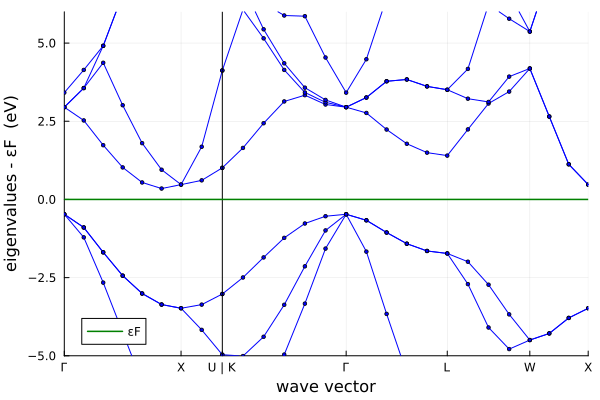

In [4]:
using Plots
using Unitful

bands = compute_bands(basis; n_bands=8, εF, kline_density=10)
p = plot_bandstructure(bands; unit=u"eV")
ylims!(p, (-5, 6))